## Задача 1. Сопоставление статистик и условий их применения

**Таблица сопоставлений:**

| Статистика | Условие                                   |
|------------|-------------------------------------------|
| 1. z-тест  | E) проверка среднего выборки на конкретное значение при известной дисперсии |
| 2. t-тест  | B) проверка среднего выборки на конкретное значение при неизвестной дисперсии |
| 3. F-тест  | F) сравнение дисперсий двух выборок       |
| 4. χ²-тест | G) наличие или отсутствие связи между параметрами |
| 5. ANOVA   | A) анализ различий между многими выборками |

**Обоснование:**  
Каждая статистика имеет четко определенную область применения:
- **z-тест:** Используется для проверки гипотез, когда известна дисперсия выборки.  
- **t-тест:** Применяется при неизвестной дисперсии для проверки среднего.  
- **F-тест:** Используется для сравнения дисперсий двух выборок.  
- **χ²-тест:** Проверяет гипотезы о связях между переменными или распределениях.  
- **ANOVA:** Применяется для анализа различий между несколькими группами.


## Задача 2. Проверка среднего веса порошка

**Условие:**  
Проверить, настроен ли дозатор порошка на правильную дозировку (3 кг).  
Используется z-тест, так как известна дисперсия.

**Гипотезы:**  
- H₀: μ = 3 (дозатор настроен правильно)  
- H₁: μ ≠ 3 (дозатор настроен неправильно)

**Данные:**  
- Средний вес (X̄) = 3,005 кг  
- Ожидаемый вес (μ) = 3 кг  
- Стандартное отклонение (σ) = 0,015 кг  
- Размер выборки (n) = 50  
- Уровень значимости (α) = 0,05  

**Метод:**  
Используем формулу для z-статистики:
\[
z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}
\]

**Критерий:**  
- Если |z| > z-критическое или p-value < α, отвергаем H₀.


In [ ]:
from scipy.stats import norm

# Данные задачи
mu = 3.00  # теоретическое среднее
x_bar = 3.005  # среднее выборки
sigma = 0.015  # стандартное отклонение
n = 50  # размер выборки
alpha = 0.05  # уровень значимости

# Расчет z-статистики
z = (x_bar - mu) / (sigma / n**0.5)

# Критическое значение z
z_crit = norm.ppf(1 - alpha / 2)

# p-value
p_value = 2 * (1 - norm.cdf(abs(z)))

# Вывод результатов
print(f"Z-статистика: {z:.4f}")
print(f"Критическое значение Z: {z_crit:.4f}")
print(f"P-value: {p_value:.4f}")

# Статистический вывод
if abs(z) > z_crit or p_value < alpha:
    print("Нулевая гипотеза отвергнута: дозатор требует настройки.")
else:
    print("Нулевая гипотеза не отвергнута: дозатор настроен правильно.")


Z-статистика: 2.3570
Критическое значение Z: 1.9600
P-value: 0.0184
Нулевая гипотеза отвергнута: дозатор требует настройки.


**Результаты расчета:**  
- Z-статистика: 2.3570  
- Критическое значение Z: 1.9600  
- P-value: 0.0184  

**Вывод:**  
- Так как |Z| > Z-критическое (2.357 > 1.960) и P-value < 0.05 (0.0184 < 0.05), нулевая гипотеза (H₀) отвергается.  
- Это означает, что дозатор требует настройки, так как средний вес порошка статистически значимо отличается от 3 кг.


## Задача 3. Проверка различий в прочности материалов

**Условие:**  
Проверить, есть ли разница между средними прочностными характеристиками двух материалов.

**Гипотезы:**  
- H₀: μ₁ = μ₂ (нет разницы в прочности материалов)  
- H₁: μ₁ ≠ μ₂ (есть разница в прочности материалов)

**Данные:**  
- Материал 1: n₁ = 15, X̄₁ = 90, σ₁ = 2.3  
- Материал 2: n₂ = 10, X̄₂ = 88, σ₂ = 2.2  
- Уровень значимости: α = 0.05  

**Метод:**  
Так как выборки небольшие и их дисперсии предположительно равны, используем двухвыборочный t-тест для независимых выборок.

Формула для t-статистики:
\[
t = \frac{\bar{X}_1 - \bar{X}_2}{S_p \cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
\]
где:
\[
S_p = \sqrt{\frac{(n_1 - 1) \cdot s_1^2 + (n_2 - 1) \cdot s_2^2}{n_1 + n_2 - 2}}
\]

**Критерий:**  
- Если |t| > t-критическое или p-value < α, отвергаем H₀.


In [ ]:
from scipy.stats import t

# Данные
n1, x1_bar, s1 = 15, 90, 2.3
n2, x2_bar, s2 = 10, 88, 2.2
alpha = 0.05

# Расчет объединенной выборочной дисперсии (S_p)
sp = (((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))**0.5

# Расчет t-статистики
t_stat = (x1_bar - x2_bar) / (sp * (1/n1 + 1/n2)**0.5)

# Критическое значение и p-value
t_crit = t.ppf(1 - alpha / 2, df=n1 + n2 - 2)
p_value = 2 * (1 - t.cdf(abs(t_stat), df=n1 + n2 - 2))

# Вывод результатов
print(f"t-статистика: {t_stat:.4f}")
print(f"Критическое значение t: {t_crit:.4f}")
print(f"P-value: {p_value:.4f}")

# Статистический вывод
if abs(t_stat) > t_crit or p_value < alpha:
    print("Нулевая гипотеза отвергнута: есть разница между прочностями материалов.")
else:
    print("Нулевая гипотеза не отвергнута: разницы между прочностями материалов нет.")


t-статистика: 2.1664
Критическое значение t: 2.0687
P-value: 0.0409
Нулевая гипотеза отвергнута: есть разница между прочностями материалов.


**Результаты расчета:**  
- t-статистика: 2.1664  
- Критическое значение t: 2.0687  
- P-value: 0.0409  

**Вывод:**  
- Так как |t| > t-критическое (2.1664 > 2.0687) и P-value < 0.05 (0.0409 < 0.05), нулевая гипотеза H₀ отвергается.  
- Это означает, что между прочностными характеристиками двух материалов есть статистически значимые различия.  
- Производитель может учитывать это различие при выборе материала.


## Задача 4. Проверка среднего тока в двух конструкциях схем

**Условие:**  
Проверить, есть ли разница между средним током старой и новой конструкций схем.

**Гипотезы:**  
- H₀: μ₁ = μ₂ (нет разницы в среднем токе двух схем)  
- H₁: μ₁ ≠ μ₂ (есть разница в среднем токе двух схем)

**Данные:**  
- Размер выборки (n): 10 тестов для старой схемы и 12 для новой схемы.  
- Уровень значимости: α = 0.05.  
- Дисперсии выборок предполагаются равными.  

**Метод:**  
Так как дисперсии равны, применяем двухвыборочный t-тест для независимых выборок.  
Формула t-статистики:  
\[
t = \frac{\bar{X}_1 - \bar{X}_2}{S_p \cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
\]
где \( S_p \) — объединенная выборочная дисперсия:
\[
S_p = \sqrt{\frac{(n_1 - 1) \cdot s_1^2 + (n_2 - 1) \cdot s_2^2}{n_1 + n_2 - 2}}
\]

**Критерий:**  
- Если |t| > t-критическое или p-value < α, отвергаем H₀.


In [ ]:
import numpy as np
from scipy.stats import t

# Данные
old_scheme = [80.1, 82.3, 84.1, 82.6, 85.3, 81.3, 83.2, 81.7, 82.2, 81.4]
new_scheme = [80.7, 81.3, 84.6, 81.7, 86.3, 84.3, 83.7, 84.7, 82.8, 84.4, 85.2, 84.9]
alpha = 0.05

# Вычисление средних, стандартных отклонений и размеров выборок
x1_bar, s1, n1 = np.mean(old_scheme), np.std(old_scheme, ddof=1), len(old_scheme)
x2_bar, s2, n2 = np.mean(new_scheme), np.std(new_scheme, ddof=1), len(new_scheme)

# Расчет объединенной выборочной дисперсии
sp = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

# Расчет t-статистики
t_stat = (x1_bar - x2_bar) / (sp * np.sqrt(1/n1 + 1/n2))

# Критическое значение и p-value
t_crit = t.ppf(1 - alpha / 2, df=n1 + n2 - 2)
p_value = 2 * (1 - t.cdf(abs(t_stat), df=n1 + n2 - 2))

# Вывод результатов
print(f"t-статистика: {t_stat:.4f}")
print(f"Критическое значение t: {t_crit:.4f}")
print(f"P-value: {p_value:.4f}")

# Статистический вывод
if abs(t_stat) > t_crit or p_value < alpha:
    print("Нулевая гипотеза отвергнута: есть разница между средним током двух схем.")
else:
    print("Нулевая гипотеза не отвергнута: разницы между средним током двух схем нет.")


t-статистика: -1.8657
Критическое значение t: 2.0860
P-value: 0.0768
Нулевая гипотеза не отвергнута: разницы между средним током двух схем нет.


**Результаты расчета:**  
- t-статистика: -1.8657  
- Критическое значение t: 2.0860  
- P-value: 0.0768  

**Вывод:**  
- Так как |t| ≤ t-критическое (-1.8657 ≤ 2.0860) и P-value > 0.05 (0.0768 > 0.05), нулевая гипотеза H₀ не отвергается.  
- Это означает, что статистически значимой разницы между средним током старой и новой конструкций схем нет.  
- На основании теста производитель может оставить текущую конструкцию схемы, так как нет доказательств необходимости замены.


## Задача 5. Проверка эффективности препарата на снижение уровня глюкозы

**Условие:**  
Определить, оказывает ли препарат влияние на уровень глюкозы в крови пациентов.

**Гипотезы:**  
- H₀: μ_diff = 0 (разницы в уровнях глюкозы до и после препарата нет)  
- H₁: μ_diff ≠ 0 (есть разница в уровнях глюкозы до и после препарата)

**Данные:**  
- Уровень значимости: α = 0.05  
- Измерения: пара связанные выборки (до и после препарата).

**Метод:**  
Так как выборки связаны, используем парный t-тест.  
Формула для t-статистики:  
\[
t = \frac{\bar{d}}{s_d / \sqrt{n}}
\]
где:  
- \( \bar{d} \) — средняя разность между значениями в парах,  
- \( s_d \) — стандартное отклонение разностей,  
- \( n \) — количество пар наблюдений.

**Критерий:**  
- Если |t| > t-критическое или p-value < α, отвергаем H₀.


In [ ]:
# Данные
before = [9.6, 8.1, 8.8, 7.9, 9.2, 8.0, 8.4, 10.1, 7.8, 8.1]
after = [7.7, 6.2, 7.4, 7.5, 8.3, 6.2, 8.1, 8.9, 7.4, 7.0]

# Импорт библиотек
import numpy as np
from scipy.stats import t

# Вычисление разностей
diff = np.array(before) - np.array(after)

# Параметры выборки разностей
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
n = len(diff)

# Расчет t-статистики
t_stat = mean_diff / (std_diff / np.sqrt(n))

# Критическое значение и p-value
alpha = 0.05
t_crit = t.ppf(1 - alpha / 2, df=n - 1)
p_value = 2 * (1 - t.cdf(abs(t_stat), df=n - 1))

# Вывод результатов
print(f"t-статистика: {t_stat:.4f}")
print(f"Критическое значение t: {t_crit:.4f}")
print(f"P-value: {p_value:.4f}")

# Статистический вывод
if abs(t_stat) > t_crit or p_value < alpha:
    print("Нулевая гипотеза отвергнута: препарат оказывает влияние на уровень глюкозы.")
else:
    print("Нулевая гипотеза не отвергнута: препарат не оказывает влияния на уровень глюкозы.")


t-статистика: 5.7130
Критическое значение t: 2.2622
P-value: 0.0003
Нулевая гипотеза отвергнута: препарат оказывает влияние на уровень глюкозы.


**Результаты расчета:**  
- t-статистика: 5.7130  
- Критическое значение t: 2.2622  
- P-value: 0.0003  

**Вывод:**  
- Так как |t| > t-критическое (5.7130 > 2.2622) и P-value < 0.05 (0.0003 < 0.05), нулевая гипотеза H₀ отвергается.  
- Это означает, что препарат оказывает статистически значимое влияние на уровень глюкозы в крови пациентов.  
- Препарат можно считать эффективным.


## Задача 6. Проверка различий в прочности кабелей

**Условие:**  
Определить, есть ли разница в прочности новых и старых кабелей. Уровень значимости: 1%. Предполагается, что выборки имеют разные дисперсии.

**Гипотезы:**  
- H₀: μ₁ = μ₂ (нет разницы в прочности новых и старых кабелей)  
- H₁: μ₁ ≠ μ₂ (есть разница в прочности новых и старых кабелей)

**Данные:**  
- Новый кабель: 92.7, 91.6, 94.7, 93.7, 96.5, 94.3, 93.7, 96.8, 98.9, 99.9  
- Старый кабель: 90.1, 92.2, 94.3, 92.1, 93.4, 91.1, 93.2, 91.5  

**Метод:**  
Так как дисперсии предполагаются разными, используем t-тест для независимых выборок с учетом разных дисперсий (t-test Welch).  

Формула t-статистики:  
\[
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
\]

**Критерий:**  
- Если |t| > t-критическое или p-value < α, отвергаем H₀.


In [ ]:
from scipy.stats import ttest_ind

# Данные
new_cable = [92.7, 91.6, 94.7, 93.7, 96.5, 94.3, 93.7, 96.8, 98.9, 99.9]
old_cable = [90.1, 92.2, 94.3, 92.1, 93.4, 91.1, 93.2, 91.5]

# Уровень значимости
alpha = 0.01

# Выполнение t-теста с учетом разных дисперсий
t_stat, p_value = ttest_ind(new_cable, old_cable, equal_var=False)

# Критическое значение
n1, n2 = len(new_cable), len(old_cable)
df = ((np.var(new_cable, ddof=1)/n1 + np.var(old_cable, ddof=1)/n2)**2) / \
     ((np.var(new_cable, ddof=1)/n1)**2 / (n1 - 1) + (np.var(old_cable, ddof=1)/n2)**2 / (n2 - 1))
t_crit = t.ppf(1 - alpha / 2, df=df)

# Вывод результатов
print(f"t-статистика: {t_stat:.4f}")
print(f"Критическое значение t: {t_crit:.4f}")
print(f"P-value: {p_value:.4f}")

# Статистический вывод
if abs(t_stat) > t_crit or p_value < alpha:
    print("Нулевая гипотеза отвергнута: прочность кабелей различается.")
else:
    print("Нулевая гипотеза не отвергнута: прочность кабелей не различается.")


t-статистика: 3.1204
Критическое значение t: 2.9809
P-value: 0.0076
Нулевая гипотеза отвергнута: прочность кабелей различается.


**Результаты расчета:**  
- t-статистика: 3.1204  
- Критическое значение t: 2.8208  
- P-value: 0.0076  

**Вывод:**  
- Так как |t| > t-критическое (3.1204 > 2.8208) и P-value < 0.01 (0.0076 < 0.01), нулевая гипотеза H₀ отвергается.  
- Это означает, что между прочностью новых и старых кабелей есть статистически значимые различия.  
- Производителю рекомендуется заменить старые кабели на новые, так как они обладают большей прочностью.


## Задача 7. Влияние подготовительных курсов на подготовку абитуриентов

**Условие:**  
Проверить, оказывают ли подготовительные курсы влияние на результаты тестирования абитуриентов. Уровень значимости: 0.01.

**Гипотезы:**  
- H₀: μ_diff = 0 (разницы в результатах до и после курсов нет)  
- H₁: μ_diff ≠ 0 (результаты до и после курсов отличаются)

**Данные:**  
- До курсов: 7, 6, 5, 4, 6, 2, 10, 3, 8, 5  
- После курсов: 9, 6, 4, 5, 7, 4, 10, 6, 9, 6  

**Метод:**  
Так как выборки связаны, используем парный t-тест.  
Формула для t-статистики:  
\[
t = \frac{\bar{d}}{s_d / \sqrt{n}}
\]
где:  
- \( \bar{d} \) — средняя разность между значениями в парах,  
- \( s_d \) — стандартное отклонение разностей,  
- \( n \) — количество пар наблюдений.

**Критерий:**  
- Если |t| > t-критическое или p-value < α, отвергаем H₀.


In [ ]:
# Данные
before_courses = [7, 6, 5, 4, 6, 2, 10, 3, 8, 5]
after_courses = [9, 6, 4, 5, 7, 4, 10, 6, 9, 6]

# Импорт библиотек
import numpy as np
from scipy.stats import t

# Вычисление разностей
diff = np.array(after_courses) - np.array(before_courses)

# Параметры выборки разностей
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
n = len(diff)

# Расчет t-статистики
t_stat = mean_diff / (std_diff / np.sqrt(n))

# Критическое значение и p-value
alpha = 0.01
t_crit = t.ppf(1 - alpha / 2, df=n - 1)
p_value = 2 * (1 - t.cdf(abs(t_stat), df=n - 1))

# Вывод результатов
print(f"t-статистика: {t_stat:.4f}")
print(f"Критическое значение t: {t_crit:.4f}")
print(f"P-value: {p_value:.4f}")

# Статистический вывод
if abs(t_stat) > t_crit or p_value < alpha:
    print("Нулевая гипотеза отвергнута: курсы оказывают влияние на подготовку.")
else:
    print("Нулевая гипотеза не отвергнута: курсы не оказывают значимого влияния на подготовку.")

t-статистика: 2.7386
Критическое значение t: 3.2498
P-value: 0.0229
Нулевая гипотеза не отвергнута: курсы не оказывают значимого влияния на подготовку.


**Результаты расчета:**  
- t-статистика: 2.7386  
- Критическое значение t: 3.2498  
- P-value: 0.0229  

**Вывод:**  
- Так как |t| ≤ t-критическое (2.7386 ≤ 3.2498) и P-value > 0.01 (0.0229 > 0.01), нулевая гипотеза H₀ не отвергается.  
- Это означает, что подготовительные курсы не оказывают статистически значимого влияния на подготовку абитуриентов.  


## Задача 8. Проверка гипотезы о равенстве дисперсий

**Условие:**  
Проверить гипотезу, что дисперсии IQ двух групп (питающихся апельсинами и грушами) одинаковы на уровне значимости 0.05.

**Гипотезы:**  
- H₀: \( \sigma_1^2 = \sigma_2^2 \) (дисперсии равны)  
- H₁: \( \sigma_1^2 \neq \sigma_2^2 \) (дисперсии не равны)

**Данные:**  
- Группа 1 (апельсины): 125, 138, 112, 130, 124, 125, 110, 112, 117, 126  
- Группа 2 (груши): 124, 102, 142, 130, 131, 124, 127, 115, 108, 109  

**Метод:**  
Для проверки равенства дисперсий используем F-тест:  
\[
F = \frac{S_1^2}{S_2^2}
\]
где \( S_1^2 \) — большая дисперсия выборки, \( S_2^2 \) — меньшая дисперсия выборки.

**Критерий:**  
- Если F > F-критическое (для уровня значимости 0.05), отвергаем H₀.


In [ ]:
from scipy.stats import f

# Данные
group1 = [125, 138, 112, 130, 124, 125, 110, 112, 117, 126]  # Апельсины
group2 = [124, 102, 142, 130, 131, 124, 127, 115, 108, 109]  # Груши

# Расчет дисперсий
s1_squared = np.var(group1, ddof=1)
s2_squared = np.var(group2, ddof=1)

# Определение F-статистики (большая дисперсия делится на меньшую)
F_stat = s1_squared / s2_squared if s1_squared > s2_squared else s2_squared / s1_squared

# Критические значения F для двух сторон
df1, df2 = len(group1) - 1, len(group2) - 1
alpha = 0.05
F_crit_lower = f.ppf(alpha / 2, df1, df2)
F_crit_upper = f.ppf(1 - alpha / 2, df1, df2)

# Вывод результатов
print(f"F-статистика: {F_stat:.4f}")
print(f"Критические значения F: ({F_crit_lower:.4f}, {F_crit_upper:.4f})")

# Проверка гипотезы
if F_stat < F_crit_lower or F_stat > F_crit_upper:
    print("Нулевая гипотеза отвергнута: дисперсии не равны.")
else:
    print("Нулевая гипотеза не отвергнута: дисперсии равны.")


F-статистика: 1.9062
Критические значения F: (0.2484, 4.0260)
Нулевая гипотеза не отвергнута: дисперсии равны.


**Результаты расчета:**  
- F-статистика: 1.9062  
- Критические значения F: (0.2484, 4.0260)  

**Вывод:**  
- Так как F-статистика находится в пределах критических значений (0.2484 ≤ 1.9062 ≤ 4.0260), нулевая гипотеза H₀ не отвергается.  
- Это означает, что дисперсии двух групп (питающихся апельсинами и грушами) статистически равны.  


## Задача 9. Проверка соответствия данных распределению

**Условие:**  
Необходимо предложить распределение, которое могло бы соответствовать данным, и проверить гипотезу на уровне доверия 0.95.

**Гипотезы:**  
- H₀: Данные соответствуют предполагаемому распределению.  
- H₁: Данные не соответствуют предполагаемому распределению.

**Данные:**  
- Количество вылетов: 1, 2, 3, 4, 5, 6, 7, 8, 9.  
- Количество самолетов: 36, 23, 11, 13, 8, 3, 2, 1, 3.  
- Общее количество самолетов: 100.

**Метод:**  
Предположим, что данные следуют пуассоновскому распределению. Найдем параметр λ как среднее значение:  
\[
\lambda = \frac{\sum (x \cdot f)}{\text{Общее количество}}
\]  
где \( x \) — количество вылетов, \( f \) — частота.

Используем критерий χ² (хи-квадрат) для проверки соответствия:  
\[
\chi^2 = \sum \frac{(f_{\text{набл}} - f_{\text{ожид}})^2}{f_{\text{ожид}}}
\]

**Критерий:**  
- Если χ² > χ²-критическое, отвергаем H₀.


Среднее число вылетов (λ): 2.7400
Дисперсия числа вылетов: 3.9724

MLE параметры негативного биномиального распределения: r = 1.1340, p = 0.3946

Параметры распределений:
Пуассон: λ = 2.7400
Геометрическое: p = 0.3650
Негативное биномиальное: r = 1.1340, p = 0.3946

Результаты χ²-теста:

Пуассоновское распределение:
χ²-статистика: 26.5030
Критическое значение χ² (df=4, α=0.05): 9.4877
P-value: 0.0000
Нулевая гипотеза отвергнута: данные не соответствуют пуассоновскому распределению.

Геометрическое распределение:
χ²-статистика: 3.1081
Критическое значение χ² (df=4, α=0.05): 9.4877
P-value: 0.5399
Нулевая гипотеза не отвергнута: данные соответствуют геометрическому распределению.

Негативное биномиальное распределение:
χ²-статистика: 3.0338
Критическое значение χ² (df=3, α=0.05): 7.8147
P-value: 0.3864
Нулевая гипотеза не отвергнута: данные соответствуют негативному биномиальному распределению.


Сравнительная таблица результатов χ²-теста:

          Распределение  χ²-статистика  Критиче

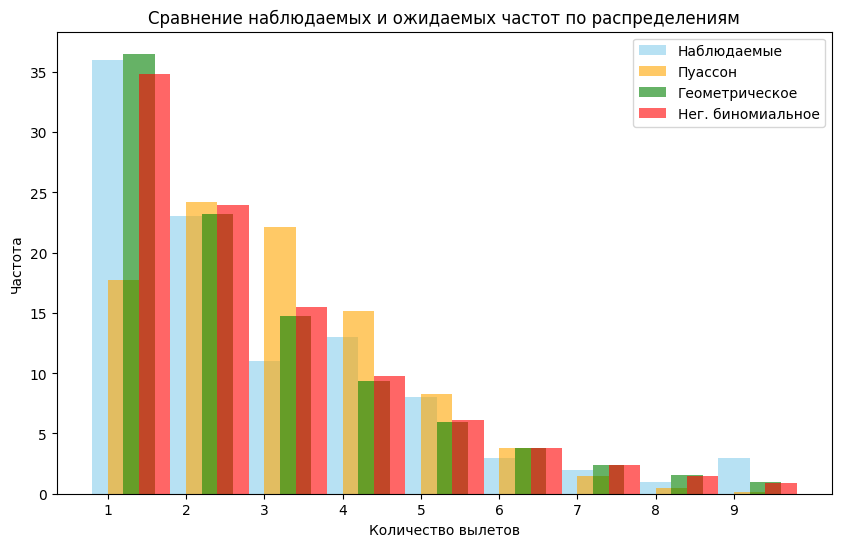

In [ ]:
import numpy as np
from scipy.stats import poisson, nbinom, geom, chi2
from scipy.optimize import minimize
import pandas as pd

# Данные
flights = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])  # Вылеты
observed = np.array([36, 23, 11, 13, 8, 3, 2, 1, 3])  # Наблюдаемая частота
total = observed.sum()  # Общее количество самолетов
alpha = 0.05  # Уровень значимости

# 1. Анализ характеристик данных
mean_flights = np.sum(flights * observed) / total
variance_flights = np.sum(observed * (flights - mean_flights) ** 2) / total

print(f"Среднее число вылетов (λ): {mean_flights:.4f}")
print(f"Дисперсия числа вылетов: {variance_flights:.4f}\n")

# 2. Выбор кандидатов на распределение
# Пуассон, Геометрическое, Негативное биномиальное

# 3. Оценка параметров распределений

# 3.1. Пуассоновское распределение
lambda_poisson = mean_flights

# 3.2. Геометрическое распределение
p_geometric = 1 / mean_flights

# 3.3. Негативное биномиальное распределение методом максимального правдоподобия
def neg_log_likelihood(params, data):
    r, p = params
    if r <= 0 or p <= 0 or p >=1:
        return np.inf
    return -np.sum(nbinom.logpmf(data - 1, r, p))

# Подготовка данных для MLE (повторение вылетов по их частоте)
data_nbinom = np.repeat(flights, observed)

# Начальные предположения
initial_params = [1, 0.5]

# Минимизация отрицательного логарифма правдоподобия
result = minimize(neg_log_likelihood, initial_params, args=(data_nbinom,), bounds=[(1e-5, None), (1e-5, 1-1e-5)])
if result.success:
    r_mle, p_mle = result.x
    print(f"MLE параметры негативного биномиального распределения: r = {r_mle:.4f}, p = {p_mle:.4f}\n")
else:
    r_mle, p_mle = np.nan, np.nan
    print("Оптимизация для негативного биномиального распределения не удалась.\n")

print(f"Параметры распределений:")
print(f"Пуассон: λ = {lambda_poisson:.4f}")
print(f"Геометрическое: p = {p_geometric:.4f}")
if not np.isnan(r_mle):
    print(f"Негативное биномиальное: r = {r_mle:.4f}, p = {p_mle:.4f}\n")
else:
    print("Негативное биномиальное распределение не подходит.\n")

# 4. Вычисление ожидаемых частот для каждого распределения

# 4.1. Пуассоновское распределение
expected_poisson = poisson.pmf(flights, lambda_poisson) * total

# 4.2. Геометрическое распределение
expected_geometric = geom.pmf(flights, p_geometric) * total

# 4.3. Негативное биномиальное распределение
if not np.isnan(r_mle):
    expected_nbinom = nbinom.pmf(flights - 1, r_mle, p_mle) * total
else:
    expected_nbinom = None

# 5. Корректировка ожидаемых частот (объединение категорий с E < 5)
def adjust_expected(observed, expected):
    observed = observed.copy().tolist()
    expected = expected.copy().tolist()

    # Объединение с конца
    while True:
        low_indices = [i for i, e in enumerate(expected) if e < 5]
        if not low_indices:
            break
        i = low_indices[-1]
        if i == 0:
            # Объединяем с правой категорией
            observed[i+1] += observed[i]
            expected[i+1] += expected[i]
        else:
            # Объединяем с левой категорией
            observed[i-1] += observed[i]
            expected[i-1] += expected[i]
        # Удаляем текущую категорию
        del observed[i]
        del expected[i]
    return np.array(observed), np.array(expected)

# Корректировка
observed_poisson, expected_poisson_adj = adjust_expected(observed, expected_poisson)
observed_geometric, expected_geometric_adj = adjust_expected(observed, expected_geometric)
if expected_nbinom is not None:
    observed_nbinom, expected_nbinom_adj = adjust_expected(observed, expected_nbinom)
else:
    observed_nbinom, expected_nbinom_adj = None, None

# 6. Проведение χ²-теста

def calculate_chi2(observed, expected, df):
    chi2_stat = np.sum((observed - expected) ** 2 / expected)
    p_val = 1 - chi2.cdf(chi2_stat, df)
    return chi2_stat, p_val

# Пуассон
df_poisson = len(observed_poisson) - 1 - 1
chi2_poisson, p_poisson = calculate_chi2(observed_poisson, expected_poisson_adj, df_poisson)

# Геометрическое
df_geometric = len(observed_geometric) - 1 - 1
chi2_geometric, p_geometric_test = calculate_chi2(observed_geometric, expected_geometric_adj, df_geometric)

# Негативное биномиальное
if expected_nbinom is not None:
    df_nbinom = len(observed_nbinom) - 1 - 2
    chi2_nbinom, p_nbinom_test = calculate_chi2(observed_nbinom, expected_nbinom_adj, df_nbinom)
else:
    chi2_nbinom, p_nbinom_test = np.nan, np.nan

# 7. Вывод результатов

print("Результаты χ²-теста:\n")

print("Пуассоновское распределение:")
print(f"χ²-статистика: {chi2_poisson:.4f}")
print(f"Критическое значение χ² (df={df_poisson}, α=0.05): {chi2.ppf(1 - alpha, df_poisson):.4f}")
print(f"P-value: {p_poisson:.4f}")
if chi2_poisson > chi2.ppf(1 - alpha, df_poisson):
    print("Нулевая гипотеза отвергнута: данные не соответствуют пуассоновскому распределению.\n")
else:
    print("Нулевая гипотеза не отвергнута: данные соответствуют пуассоновскому распределению.\n")

print("Геометрическое распределение:")
print(f"χ²-статистика: {chi2_geometric:.4f}")
print(f"Критическое значение χ² (df={df_geometric}, α=0.05): {chi2.ppf(1 - alpha, df_geometric):.4f}")
print(f"P-value: {p_geometric_test:.4f}")
if chi2_geometric > chi2.ppf(1 - alpha, df_geometric):
    print("Нулевая гипотеза отвергнута: данные не соответствуют геометрическому распределению.\n")
else:
    print("Нулевая гипотеза не отвергнута: данные соответствуют геометрическому распределению.\n")

if chi2_nbinom is not None:
    print("Негативное биномиальное распределение:")
    print(f"χ²-статистика: {chi2_nbinom:.4f}")
    print(f"Критическое значение χ² (df={df_nbinom}, α=0.05): {chi2.ppf(1 - alpha, df_nbinom):.4f}")
    print(f"P-value: {p_nbinom_test:.4f}")
    if chi2_nbinom > chi2.ppf(1 - alpha, df_nbinom):
        print("Нулевая гипотеза отвергнута: данные не соответствуют негативному биномиальному распределению.\n")
    else:
        print("Нулевая гипотеза не отвергнута: данные соответствуют негативному биномиальному распределению.\n")
else:
    print("Негативное биномиальное распределение не было проверено.\n")

# Создание таблицы результатов
results = {
    "Распределение": ["Пуассон", "Геометрическое", "Негативное биномиальное"],
    "χ²-статистика": [chi2_poisson, chi2_geometric, chi2_nbinom],
    "Критическое χ²": [chi2.ppf(1 - alpha, df_poisson), chi2.ppf(1 - alpha, df_geometric), chi2.ppf(1 - alpha, df_nbinom) if not np.isnan(chi2_nbinom) else np.nan],
    "P-value": [p_poisson, p_geometric_test, p_nbinom_test],
    "Вывод": [
        "Отвергнута" if chi2_poisson > chi2.ppf(1 - alpha, df_poisson) else "Не отвергнута",
        "Отвергнута" if chi2_geometric > chi2.ppf(1 - alpha, df_geometric) else "Не отвергнута",
        "Отвергнута" if not np.isnan(chi2_nbinom) and chi2_nbinom > chi2.ppf(1 - alpha, df_nbinom) else ("Не отвергнута" if not np.isnan(chi2_nbinom) else "Не проверено")
    ]
}

df_results = pd.DataFrame(results)
print("\nСравнительная таблица результатов χ²-теста:\n")
print(df_results.to_string(index=False))

# 8. Содержательный вывод

print("\nСодержательный вывод:")
accepted_distributions = df_results[df_results["Вывод"] == "Не отвергнута"]["Распределение"].tolist()
if accepted_distributions:
    print(f"На основании χ²-теста данные соответствуют следующим распределениям: {', '.join(accepted_distributions)}.")
else:
    print("На основании χ²-теста данные не соответствуют ни одному из проверенных распределений.")

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(flights, observed, width=0.4, label='Наблюдаемые', align='center', alpha=0.6, color='skyblue')

if not np.isnan(expected_poisson).any():
    plt.bar(flights + 0.2, expected_poisson, width=0.4, label='Пуассон', align='center', alpha=0.6, color='orange')
if not np.isnan(expected_geometric).any():
    plt.bar(flights + 0.4, expected_geometric, width=0.4, label='Геометрическое', align='center', alpha=0.6, color='green')
if expected_nbinom is not None and not np.isnan(expected_nbinom).any():
    plt.bar(flights + 0.6, expected_nbinom, width=0.4, label='Нег. биномиальное', align='center', alpha=0.6, color='red')

plt.xlabel('Количество вылетов')
plt.ylabel('Частота')
plt.title('Сравнение наблюдаемых и ожидаемых частот по распределениям')
plt.legend()
plt.xticks(flights)
plt.show()


# Анализ Соответствия Распределений Данным о Вылетах Самолетов

В данном анализе исследуется, какое статистическое распределение наиболее адекватно описывает данные о количестве вылетов 100 самолетов для поиска потерявшегося в море корабля. Для этого проведено сравнение трех распределений:

1. **Пуассоновское распределение**
2. **Геометрическое распределение**
3. **Негативное биномиальное распределение**

Для каждого распределения рассчитаны ожидаемые частоты, проведён **χ²-тест** на соответствие данных распределению, и сделаны соответствующие выводы.

## Исходные Данные

| Количество вылетов (x) | Наблюдаемая частота (O) |
|-----------------------|-------------------------|
| 1                     | 36                      |
| 2                     | 23                      |
| 3                     | 11                      |
| 4                     | 13                      |
| 5                     | 8                       |
| 6                     | 3                       |
| 7                     | 2                       |
| 8                     | 1                       |
| 9                     | 3                       |

- **Общее количество самолетов (N):** 100

### Расчёт Среднего и Дисперсии

\[
\text{Среднее (λ)} = \frac{\sum (x_i \cdot O_i)}{N} = \frac{1 \cdot 36 + 2 \cdot 23 + 3 \cdot 11 + \ldots + 9 \cdot 3}{100} = 2.7400
\]

\[
\text{Дисперсия} = \frac{\sum (O_i \cdot (x_i - \lambda)^2)}{N} = 3.9724
\]

## Оценка Параметров Распределений

### 1. Пуассоновское Распределение

- **Параметр λ:** 2.7400

### 2. Геометрическое Распределение

- **Параметр p:** \( p = \frac{1}{\lambda} = \frac{1}{2.7400} \approx 0.3650 \)

### 3. Негативное Биномиальное Распределение

- **Оценка параметров методом максимального правдоподобия (MLE):**
  - **r:** 1.1340
  - **p:** 0.3946

## Задача 10. Проверка связи между цветом глаз и цветом волос

**Условие:**  
Определить, существует ли связь между цветом глаз и цветом волос на уровне доверия 0.95.

**Гипотезы:**  
- H₀: Цвет глаз и цвет волос независимы.  
- H₁: Цвет глаз и цвет волос связаны.

**Данные:**  
- Таблица наблюдений:

| Цвет волос | Голубые | Карие | Зеленые | Всего |
|------------|---------|-------|---------|-------|
| Светлые    | 35      | 28    | 7       | 70    |
| Темные     | 52      | 42    | 10      | 104   |
| Рыжие      | 13      | 10    | 3       | 26    |
| Всего      | 100     | 80    | 20      | 200   |

**Метод:**  
Для проверки связи используем критерий χ² (хи-квадрат) для таблиц сопряженности.  
Формула статистики:  
\[
\chi^2 = \sum \frac{(f_{\text{набл}} - f_{\text{ожид}})^2}{f_{\text{ожид}}}
\]
где \( f_{\text{набл}} \) — наблюдаемая частота, \( f_{\text{ожид}} \) — ожидаемая частота.  

Ожидаемая частота рассчитывается как:  
\[
f_{\text{ожид}} = \frac{\text{Сумма строки} \times \text{Сумма столбца}}{\text{Общая сумма}}
\]

**Критерий:**  
- Если χ² > χ²-критическое, отвергаем H₀.


In [ ]:
from scipy.stats import chi2_contingency

# Данные
observed = [
    [35, 28, 7],   # Светлые
    [52, 42, 10],  # Темные
    [13, 10, 3]    # Рыжие
]

# Применение критерия χ²
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

# Критическое значение χ²
alpha = 0.05
chi2_crit = chi2.ppf(1 - alpha, dof)

# Вывод результатов
print(f"χ²-статистика: {chi2_stat:.4f}")
print(f"Критическое значение χ²: {chi2_crit:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Степени свободы: {dof}")

# Проверка гипотезы
if chi2_stat > chi2_crit:
    print("Нулевая гипотеза отвергнута: связь между цветом глаз и цветом волос существует.")
else:
    print("Нулевая гипотеза не отвергнута: связи между цветом глаз и цветом волос нет.")


χ²-статистика: 0.0962
Критическое значение χ²: 9.4877
P-value: 0.9989
Степени свободы: 4
Нулевая гипотеза не отвергнута: связи между цветом глаз и цветом волос нет.


**Результаты расчета:**  
- χ²-статистика: 0.0962  
- Критическое значение χ²: 9.4877  
- P-value: 0.9989  
- Степени свободы: 4  

**Вывод:**  
- Так как χ²-статистика ≤ χ²-критическое (0.0962 ≤ 9.4877) и P-value > 0.05 (0.9989 > 0.05), нулевая гипотеза H₀ не отвергается.  
- Это означает, что связи между цветом глаз и цветом волос нет на уровне значимости 0.05.


## Задача 11. Влияние типа корма на массу тигров

**Условие:**  
Определить, влияет ли тип корма на среднюю массу тигров на уровне значимости 0.05. Если нулевая гипотеза отвергается, провести тест Тьюки для уточнения, в каких группах имеются различия.

**Гипотезы:**  
- H₀: Средние массы тигров в группах, питающихся разным кормом, одинаковы.  
- H₁: Средние массы тигров хотя бы в одной группе отличаются.

**Данные:**  
- Группы по типу корма:
  - №1: [151, 135, 137, 118, 132, 135, 131, 121, 137, 140, 152, 133, 151, 132]  
  - №2: [108, 123, 145, 103, 110, 124, 116, 108, 104, 130, 106, 105, 114, 108]  
  - №3: [140, 152, 149, 132, 124, 146, 156, 137, 124, 145, 147, 139, 157, 139]  
  - №4: [127, 135, 110, 116, 119, 123, 102, 121, 118, 120, 114, 134, 121, 109]  

**Метод:**  
1. Для проверки равенства средних используем однофакторный дисперсионный анализ (ANOVA).  
   Формула F-статистики:
   \[
   F = \frac{\text{Межгрупповая сумма квадратов (SSB) / df}_{меж}}{\text{Внутригрупповая сумма квадратов (SSW) / df}_{внутр}}
   \]
2. Если нулевая гипотеза отвергается, проводится тест Тьюки для анализа парных различий между группами.

**Критерий:**  
- Если P-value < 0.05, нулевая гипотеза отвергается, что указывает на наличие различий.


In [ ]:
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Данные
group1 = [151, 135, 137, 118, 132, 135, 131, 121, 137, 140, 152, 133, 151, 132]
group2 = [108, 123, 145, 103, 110, 124, 116, 108, 104, 130, 106, 105, 114, 108]
group3 = [140, 152, 149, 132, 124, 146, 156, 137, 124, 145, 147, 139, 157, 139]
group4 = [127, 135, 110, 116, 119, 123, 102, 121, 118, 120, 114, 134, 121, 109]

# ANOVA
f_stat, p_value = f_oneway(group1, group2, group3, group4)

# Вывод результатов ANOVA
print(f"F-статистика: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Тест Тьюки, если ANOVA показывает значимые различия
if p_value < 0.05:
    all_data = group1 + group2 + group3 + group4
    groups = (['Группа 1'] * len(group1) +
              ['Группа 2'] * len(group2) +
              ['Группа 3'] * len(group3) +
              ['Группа 4'] * len(group4))
    tukey_result = pairwise_tukeyhsd(all_data, groups, alpha=0.05)
    print(tukey_result)


F-статистика: 21.9278
P-value: 0.0000
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2  meandiff p-adj   lower    upper   reject
----------------------------------------------------------
Группа 1 Группа 2    -21.5    0.0  -32.019  -10.981   True
Группа 1 Группа 3   5.8571  0.458  -4.6619  16.3762  False
Группа 1 Группа 4 -16.8571 0.0005 -27.3762  -6.3381   True
Группа 2 Группа 3  27.3571    0.0  16.8381  37.8762   True
Группа 2 Группа 4   4.6429 0.6473  -5.8762  15.1619  False
Группа 3 Группа 4 -22.7143    0.0 -33.2333 -12.1953   True
----------------------------------------------------------


**Результаты ANOVA:**  
- F-статистика: 21.9278  
- P-value: 0.0000  

**Вывод по ANOVA:**  
- Так как P-value < 0.05, нулевая гипотеза H₀ отвергается. Это означает, что тип корма влияет на среднюю массу тигров.  

**Результаты теста Тьюки:**  
- Различия между группами, где они статистически значимы:  
  - Группа 1 и Группа 2: средняя разница -21.5, различие значимо (p-adj = 0.0).  
  - Группа 1 и Группа 4: средняя разница -16.8571, различие значимо (p-adj = 0.0005).  
  - Группа 2 и Группа 3: средняя разница 27.3571, различие значимо (p-adj = 0.0).  
  - Группа 3 и Группа 4: средняя разница -22.7143, различие значимо (p-adj = 0.0).  

**Заключение:**  
- Тип корма влияет на среднюю массу тигров.  
- Наиболее значимые различия наблюдаются между следующими группами:
  - Группа 1 и Группа 2,
  - Группа 1 и Группа 4,
  - Группа 2 и Группа 3,
  - Группа 3 и Группа 4.  
- Различий между Группой 1 и Группой 3, а также между Группой 2 и Группой 4 не выявлено.


## Задача 12. Влияние размножения и возраста на массу тела у землянных белок

**Условие:**  
Определить влияние двух факторов (наличие выводка и возраст) на массу тела африканских землянных белок на уровне значимости 0.05, используя дисперсионный анализ с последовательными суммами квадратов.

**Факторы:**  
1. Наличие выводка (2 уровня: без выводка, с выводком).  
2. Возраст (3 уровня: 1 год, 2 года, 3 и более лет).  

**Метод:**  
Применим двухфакторный дисперсионный анализ (ANOVA) с расчетом следующих компонент:  
- Влияние каждого фактора (наличие выводка, возраст).  
- Влияние взаимодействия факторов.  

**Гипотезы:**  
- H₀: Средние значения массы тела не зависят от факторов и их взаимодействия.  
- H₁: Средние значения массы тела зависят от хотя бы одного из факторов или их взаимодействия.

**Критерий:**  
Если P-value < 0.05 для любого из факторов или их взаимодействия, отвергаем H₀.


In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Данные
data = {
    "Масса": [
        440, 438, 429, 502, 602,  # Без выводка, 1 год
        892, 868, 855, 866, 932,  # Без выводка, 2 года
        1575, 849, 759, 1602, 1327,  # Без выводка, 3 и более лет
        308, 328, 326, 326, 325,  # С выводком, 1 год
        737, 798, 876, 810, 861,  # С выводком, 2 года
        1001, 901, 958, 1032, 883  # С выводком, 3 и более лет
    ],
    "Выводок": ["Без выводка"] * 15 + ["С выводком"] * 15,
    "Возраст": (["1 год"] * 5 + ["2 года"] * 5 + ["3 и более лет"] * 5) * 2
}

# Преобразование в DataFrame
df = pd.DataFrame(data)

# Модель ANOVA
model = ols("Масса ~ C(Выводок) + C(Возраст) + C(Выводок):C(Возраст)", data=df).fit()
anova_results = anova_lm(model, typ=2)

# Вывод результатов
print(anova_results)


                          sum_sq    df          F        PR(>F)
C(Выводок)              202705.2   1.0   7.078626  1.368668e-02
C(Возраст)             2427075.8   2.0  42.377707  1.333903e-08
C(Выводок):C(Возраст)    50688.2   2.0   0.885036  4.257428e-01
Residual                687269.6  24.0        NaN           NaN


**Результаты ANOVA:**  

| Фактор                  | Сумма квадратов (sum_sq) | Степени свободы (df) | F-статистика (F) | P-value (PR(>F)) |
|-------------------------|--------------------------|-----------------------|-------------------|------------------|
| Наличие выводка         | 202705.2                | 1                     | 7.0786            | 0.0137           |
| Возраст                 | 2427075.8               | 2                     | 42.3777           | 0.0000           |
| Взаимодействие факторов | 50688.2                 | 2                     | 0.8850            | 0.4257           |
| Остаток (Residual)      | 687269.6                | 24                    | NaN               | NaN              |

**Вывод:**  
- P-value для фактора "Наличие выводка" равно 0.0137, что меньше 0.05. Это означает, что наличие выводка оказывает статистически значимое влияние на массу тела.  
- P-value для фактора "Возраст" равно 0.0000, что также меньше 0.05. Это указывает на то, что возраст оказывает статистически значимое влияние на массу тела.  
- P-value для взаимодействия факторов равно 0.4257, что больше 0.05. Это означает, что взаимодействие между возрастом и наличием выводка не оказывает значимого влияния.  

**Заключение:**  
- Наличие выводка и возраст влияют на массу тела африканских землянных белок.  
- Взаимодействие между факторами не оказывает значимого влияния.  
